<a href="https://colab.research.google.com/github/grzegorzx/breast_cancer_classifier/blob/main/wine_quality_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data import and pre-processing

In [19]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/drive/MyDrive/datasets/wine.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


**About the dataset:**
This Data set contains the information related red wine , Various factors affecting the quality. This data set was prepossessed and downloaded from the UCI Machine Learning Repository. This data set was simple, cleaned, practice data set for classification modelling. Source of this Dataset: https://archive.ics.uci.edu/ml/datasets/wine+quality

Attribute Information:
Input variables (based on physicochemical tests):
*1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality ('good' and 'bad' based on score >5 and <5)*

Source: https://www.kaggle.com/nareshbhat/wine-quality-binary-classification

In [20]:
df.columns = df.columns.str.replace(" ", "_")
df.rename(str.lower, axis=1, inplace=True)

quality_dict = {'good': 1,'bad': 0}
df.quality = [quality_dict[item] for item in df.quality]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   ph                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3a60d6ce48>,
      dtype=object)

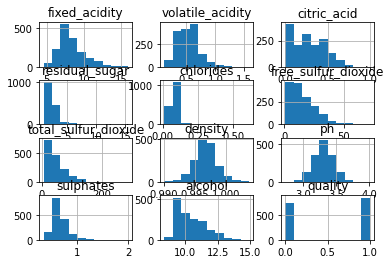

In [21]:
df.hist()

Chlorides and Sulphates featues both are left-skewed and may contain outliers that may affect the accuracy of the model. Let's take a look at them.

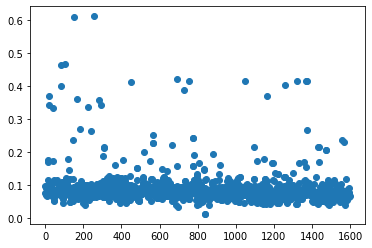

In [22]:
import matplotlib.pyplot as plt

plt.scatter(df.chlorides.index, df.chlorides)

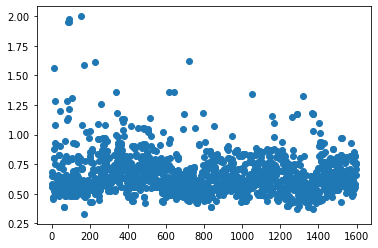

In [23]:
plt.scatter(df.sulphates.index, df.sulphates)

In [24]:
df.drop(df[df.chlorides > 0.5].index, inplace=True)
df.drop(df[df.sulphates > 1.75].index, inplace=True)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1594 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1594 non-null   float64
 1   volatile_acidity      1594 non-null   float64
 2   citric_acid           1594 non-null   float64
 3   residual_sugar        1594 non-null   float64
 4   chlorides             1594 non-null   float64
 5   free_sulfur_dioxide   1594 non-null   float64
 6   total_sulfur_dioxide  1594 non-null   float64
 7   density               1594 non-null   float64
 8   ph                    1594 non-null   float64
 9   sulphates             1594 non-null   float64
 10  alcohol               1594 non-null   float64
 11  quality               1594 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 161.9 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,ph,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [25]:
df.isna().sum()

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
ph                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

With the data cleaned, it's time to split the data for training and validation and normalising it.

In [26]:
from sklearn.model_selection import train_test_split

y_vals = df.quality.to_numpy()
x_vals = df.drop(['quality'], axis=1).to_numpy()

y_vals.shape[0] == x_vals.shape[0]

x_train, x_valid, y_train, y_valid = train_test_split(x_vals, y_vals, test_size=0.2, shuffle= True)

In [71]:
from sklearn.preprocessing import MinMaxScaler
# Normalising x_train dataset

scaler = MinMaxScaler()

scaled_x_train = scaler.fit_transform(x_train)
scaled_x_train.max()

#MinMaxScaler returned max value > 1, so let's re-scale our data ourselves.

def rescale(data, new_min=0, new_max=1):
    """Rescale the data to be within the range [new_min, new_max]"""
    return (data - data.min()) / (data.max() - data.min()) * (new_max - new_min) + new_min

scaled_x_train = rescale(x_train)
scaled_x_train

scaled_x_valid = rescale(x_valid)

With data prepared, we can proceed to training our models

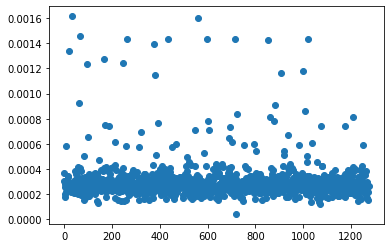

In [46]:
scaled_x_train_df = pd.DataFrame(data=scaled_x_train, columns=df.columns[:-1])
plt.scatter(scaled_x_train_df.chlorides.index, scaled_x_train_df.chlorides)

As scaling the data doesn't work well with outliers, I'm preparing separate dataset with the normalized data.
For the purpose of this excercierse, I will be using standard normalisation, as opposed to Z-score normalisation.

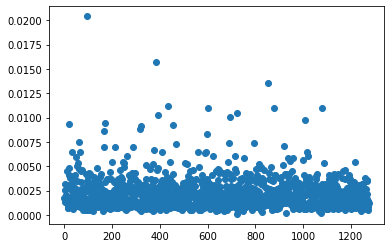

In [72]:
from sklearn.preprocessing import normalize

normalised_x_train = normalize(x_train)

normalised_x_valid = normalize(x_valid)

normalised_x_train_df = pd.DataFrame(data=normalised_x_train, columns=df.columns[:-1])
plt.scatter(normalised_x_train_df.chlorides.index, normalised_x_train_df.chlorides)

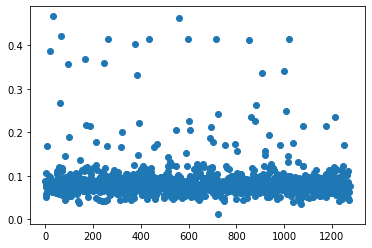

In [75]:
# Sklearn standard scaler using z-score
from sklearn.preprocessing import StandardScaler

standard_scaled_x_train = StandardScaler(x_train).copy

standard_scaled_x_valid = StandardScaler(x_valid).copy

standard_scaled_x_train_df = pd.DataFrame(data=standard_scaled_x_train, columns=df.columns[:-1])
plt.scatter(standard_scaled_x_train_df.chlorides.index, standard_scaled_x_train_df.chlorides)

## Machine learninng - K-nearest neighbours

In [28]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3) # We'll start with low k value, but will find the best k later.
classifier.fit(scaled_x_train, y_train)
classifier.score(x_valid, y_valid)

# Very low score. Let's try to find better k and if that won't work, normalise validation data.

0.5047021943573667

In [29]:
def k_finder(training_data, training_labels, validation_data, validation_labels):
  ks = []
  for k in range(1, 101):
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(training_data, training_labels)
    score = classifier.score(validation_data, validation_labels)
    ks.append([k, score])
  return ks

best_k = k_finder(scaled_x_train, y_train, x_valid, y_valid)

superstar_k = max(map(lambda x: (x[1],x[0]), best_k))
superstar_k # k < 1 definitely is not what we're looking for.

(0.5047021943573667, 7)

Not the accuracy we were looking for. Let's see if rescaling the validation dataset will change how we score the model.

In [30]:
scaled_x_valid = rescale(x_valid)

In [31]:
best_k = k_finder(scaled_x_train, y_train, scaled_x_valid, y_valid)
superstar_k = max(map(lambda x: (x[1],x[0]), best_k))
superstar_k

(0.6206896551724138, 83)

Better results now. Is KNN not appropriate method for this classification?
Let's to one last thing - train the model on the non-normalised data.

In [32]:
classifier = KNeighborsClassifier(n_neighbors = 3) # using the same k to compare results.
classifier.fit(x_train, y_train)
classifier.score(x_valid, y_valid)

0.6990595611285266

Better, however not ideal results. Let's find the best k.

In [33]:
best_k = k_finder(x_train, y_train, x_valid, y_valid)
superstar_k = max(map(lambda x: (x[1],x[0]), best_k))
superstar_k

(0.7648902821316614, 1)

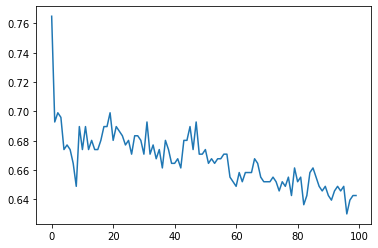

In [34]:
list_k = range(len(best_k))
accuracies = [accuracy[1] for accuracy in best_k]
plt.plot(list_k, accuracies)

Slightly better results on the non-normalised data, however k=1 suggest we may be overfitting. Our second-best k value is 42 and for the purpose of this excercise, I'll assume it's the value we're looking for.

The accuracy is still, however, very low. Let's see how the deep learning model will perform with that prediction.

## Logistic regression with Keras

Epoch 1/1500
13/13 - 0s - loss: 2.0748 - accuracy: 0.4573
Epoch 2/1500
13/13 - 0s - loss: 1.1661 - accuracy: 0.4573
Epoch 3/1500
13/13 - 0s - loss: 0.9867 - accuracy: 0.4573
Epoch 4/1500
13/13 - 0s - loss: 0.9142 - accuracy: 0.4573
Epoch 5/1500
13/13 - 0s - loss: 0.8554 - accuracy: 0.4588
Epoch 6/1500
13/13 - 0s - loss: 0.7952 - accuracy: 0.4620
Epoch 7/1500
13/13 - 0s - loss: 0.7488 - accuracy: 0.4918
Epoch 8/1500
13/13 - 0s - loss: 0.7195 - accuracy: 0.5333
Epoch 9/1500
13/13 - 0s - loss: 0.7025 - accuracy: 0.5459
Epoch 10/1500
13/13 - 0s - loss: 0.6931 - accuracy: 0.5514
Epoch 11/1500
13/13 - 0s - loss: 0.6877 - accuracy: 0.5686
Epoch 12/1500
13/13 - 0s - loss: 0.6840 - accuracy: 0.5678
Epoch 13/1500
13/13 - 0s - loss: 0.6820 - accuracy: 0.5647
Epoch 14/1500
13/13 - 0s - loss: 0.6810 - accuracy: 0.5820
Epoch 15/1500
13/13 - 0s - loss: 0.6800 - accuracy: 0.5820
Epoch 16/1500
13/13 - 0s - loss: 0.6797 - accuracy: 0.5827
Epoch 17/1500
13/13 - 0s - loss: 0.6792 - accuracy: 0.5843
Epoch 

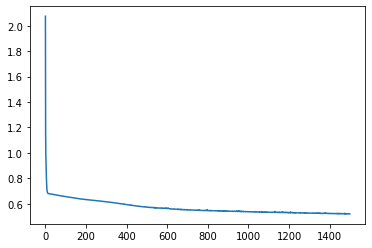

In [91]:
import keras
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=11, activation='relu'))
model.add(Dense(1, activation='tanh')) # Swapped softmax to tanh for experiment

# opt = keras.optimizers.Adam(learning_rate=0.01)

model.compile(
    loss='binary_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy']
    )

# Fit the model
history = model.fit(
    normalised_x_train, 
    y_train, 
    epochs=1500, 
    batch_size=100,
    verbose=2
    )

# Evaluate the model
loss, accuracy = model.evaluate(normalised_x_valid, y_valid)
print(f'Loss: {round(loss,4)} Accuracy: {round(accuracy*100)}%')
plt.plot(history.history['loss'])